# 0. Install and Import Dependencies

In [6]:
!pip install mediapipe opencv-python pandas scikit-learn

In [7]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

In [8]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

# 1. Make Some Detections

In [9]:
import cv2
import mediapipe as mp

# Initialize Mediapipe utilities
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh  # Add face mesh module

# Capture video
cap = cv2.VideoCapture(0)

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        

        # Make Detections
        results = holistic.process(image)

        # Convert back to BGR for OpenCV display
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # 1. Draw face landmarks (Fixed)
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,  
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))

        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
                        
        # Display
        cv2.imshow('Raw Webcam Feed', image)

        # Exit on pressing 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [13]:
results.face_landmarks.landmark[0].visibility

0.0

# 2. Capture Landmarks & Export to CSV
<!--<img src="https://i.imgur.com/8bForKY.png">-->
<!--<img src="https://i.imgur.com/AzKNp7A.png">-->

In [14]:
import csv
import os
import numpy as np

In [15]:
num_coords = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)
num_coords

501

In [16]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [17]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [19]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [26]:
class_name = "Abhinav"

In [27]:
cap = cv2.VideoCapture(0)

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        

        # Make Detections
        results = holistic.process(image)

        # Convert back to BGR for OpenCV display
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # 1. Draw face landmarks (Fixed)
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,  
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))

        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        
        # Export coordinates
        try:
            # Extract Pose landmarks
            if results.pose_landmarks:
                pose = results.pose_landmarks.landmark
                pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            else:
                pose_row = []

            # Extract Face landmarks
            if results.face_landmarks:
                face = results.face_landmarks.landmark
                face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            else:
                face_row = []

            # Concatenate rows
            row = pose_row + face_row

            if row:  # Only write if data is present
                # Append class name 
                row.insert(0, class_name)

                # Export to CSV
                with open('coords.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)

        except Exception as e:
            print(f"Error exporting data: {e}")
                        
        cv2.imshow('Raw Webcam Feed', image)

        # Exit on pressing 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# 3. Train Custom Model Using Scikit Learn

## 3.1 Read in Collected Data and Process

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('coords.csv')

In [30]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,Hurray,0.496486,0.593124,-0.795430,0.999998,0.526893,0.539146,-0.731608,0.999991,0.540855,...,0.004074,0.0,0.551498,0.544471,0.024287,0.0,0.556502,0.540941,0.025126,0.0
1,Hurray,0.492800,0.592172,-0.785589,0.999998,0.523302,0.537836,-0.715230,0.999991,0.538191,...,0.003960,0.0,0.551207,0.544902,0.023421,0.0,0.556175,0.541270,0.024263,0.0
2,Hurray,0.492450,0.592472,-0.862868,0.999998,0.522859,0.537945,-0.790493,0.999992,0.537822,...,0.003366,0.0,0.553909,0.556240,0.022812,0.0,0.559172,0.550738,0.023869,0.0
3,Hurray,0.491858,0.593135,-0.846799,0.999998,0.522386,0.538164,-0.776856,0.999992,0.537498,...,0.004582,0.0,0.557118,0.554482,0.025597,0.0,0.562334,0.550264,0.026571,0.0
4,Hurray,0.491833,0.593377,-0.838755,0.999998,0.522337,0.538219,-0.769938,0.999992,0.537487,...,0.003508,0.0,0.557247,0.554681,0.023857,0.0,0.562469,0.550358,0.024806,0.0


In [31]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
412,Abhinav,0.490559,0.523129,-1.689062,0.999997,0.522649,0.440575,-1.605889,0.999995,0.540931,...,0.000860,0.0,0.556712,0.447670,0.027194,0.0,0.563160,0.440726,0.028347,0.0
413,Abhinav,0.490493,0.523653,-1.653110,0.999997,0.522573,0.440686,-1.571289,0.999995,0.540830,...,0.000917,0.0,0.556478,0.448875,0.027382,0.0,0.562893,0.441832,0.028587,0.0
414,Abhinav,0.490228,0.524798,-1.512309,0.999994,0.522276,0.441529,-1.447182,0.999990,0.540454,...,0.000463,0.0,0.556534,0.449004,0.026377,0.0,0.562971,0.441764,0.027545,0.0
415,Abhinav,0.488648,0.524799,-1.303374,0.999989,0.521112,0.441726,-1.220480,0.999984,0.538930,...,-0.000047,0.0,0.556676,0.448886,0.025954,0.0,0.563014,0.441953,0.027084,0.0
416,Abhinav,0.488853,0.523294,-1.283817,0.999988,0.520921,0.441132,-1.205248,0.999981,0.538727,...,0.000111,0.0,0.558960,0.451631,0.027223,0.0,0.565213,0.444628,0.028432,0.0


In [32]:
df[df['class']=='Sad']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501


In [33]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [35]:
y_test

71      Hurray
224         Hi
281      Great
395    Abhinav
399    Abhinav
        ...   
37      Hurray
67      Hurray
0       Hurray
271      Great
123     Hurray
Name: class, Length: 126, dtype: object

## 3.2 Train Machine Learning Classification Model

In [36]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [37]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [38]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

pipelines = {
    'log_reg': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'ridge_classifier': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', RidgeClassifier())
    ]),
    'random_forest': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    'gradient_boosting': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier())
    ]),
    'svm': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', SVC(probability=True))
    ])
}


In [39]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [40]:
fit_models

{'log_reg': Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                 ('classifier', LogisticRegression())]),
 'ridge_classifier': Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                 ('classifier', RidgeClassifier())]),
 'random_forest': Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                 ('classifier', RandomForestClassifier())]),
 'gradient_boosting': Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                 ('classifier', GradientBoostingClassifier())]),
 'svm': Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                 ('classifier', SVC(probability=True))])}

In [41]:
predictions = fit_models['random_forest'].predict(X_test)


## 3.3 Evaluate and Serialize Model 

In [42]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [43]:

for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))


log_reg 1.0
ridge_classifier 1.0
random_forest 1.0
gradient_boosting 1.0
svm 1.0


In [44]:
fit_models['random_forest'].predict(X_test)

array(['Hurray', 'Hi', 'Great', 'Abhinav', 'Abhinav', 'Hurray', 'Hurray',
       'Abhinav', 'Hi', 'Hi', 'Hurray', 'Great', 'Abhinav', 'Hurray',
       'Hurray', 'Hi', 'Hi', 'Hurray', 'Hurray', 'Hurray', 'Abhinav',
       'Hurray', 'Hi', 'Hurray', 'Great', 'Hi', 'Hi', 'Hurray', 'Great',
       'Great', 'Great', 'Hurray', 'Hurray', 'Hi', 'Hi', 'Hurray',
       'Great', 'Abhinav', 'Hurray', 'Great', 'Hurray', 'Hurray',
       'Abhinav', 'Abhinav', 'Hi', 'Abhinav', 'Hi', 'Hurray', 'Abhinav',
       'Abhinav', 'Hi', 'Great', 'Hurray', 'Hi', 'Hi', 'Hurray',
       'Abhinav', 'Hurray', 'Hurray', 'Hurray', 'Abhinav', 'Hurray',
       'Hurray', 'Great', 'Hi', 'Abhinav', 'Abhinav', 'Abhinav', 'Hi',
       'Great', 'Great', 'Great', 'Hurray', 'Hurray', 'Abhinav', 'Hurray',
       'Great', 'Great', 'Abhinav', 'Hurray', 'Hurray', 'Hi', 'Abhinav',
       'Hurray', 'Great', 'Hurray', 'Hi', 'Abhinav', 'Great', 'Hurray',
       'Abhinav', 'Hi', 'Abhinav', 'Hi', 'Great', 'Hurray', 'Great',
       'Great

In [45]:
y_test

71      Hurray
224         Hi
281      Great
395    Abhinav
399    Abhinav
        ...   
37      Hurray
67      Hurray
0       Hurray
271      Great
123     Hurray
Name: class, Length: 126, dtype: object

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed Report
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

     Abhinav       1.00      1.00      1.00        29
       Great       1.00      1.00      1.00        27
          Hi       1.00      1.00      1.00        26
      Hurray       1.00      1.00      1.00        44

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



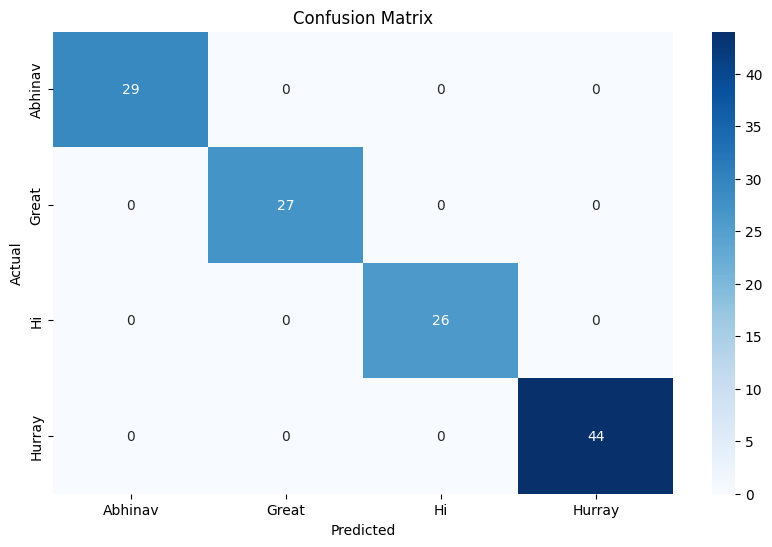

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [48]:
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['random_forest'], f)

# 4. Make Detections with Model

In [49]:
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [50]:
model
import mediapipe as mp

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils


In [51]:
import time
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd


mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)

action_start_time = None
action_duration = 3 
last_action = None
sentence = [] 

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            pose = results.pose_landmarks.landmark
            face = results.face_landmarks.landmark
            row = (
                list(np.array([[l.x, l.y, l.z, l.visibility] for l in pose]).flatten()) +
                list(np.array([[l.x, l.y, l.z, l.visibility] for l in face]).flatten())
            )

            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]

            current_time = time.time()

            if body_language_class != last_action:
                action_start_time = current_time
                last_action = body_language_class

            if (current_time - action_start_time >= action_duration):
                if len(sentence) == 0 or (body_language_class != sentence[-1]):
                    sentence.append(body_language_class)

            cv2.rectangle(image, (0, 430), (640, 480), (255, 0, 0), -1)

            display_text = ' '.join(sentence[-10:])  # Last 10 words
            cv2.putText(image, display_text, (10, 465), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                        (255, 255, 255), 2, cv2.LINE_AA)

            cv2.rectangle(image, (0, 0), (250, 60), (245, 117, 16), -1)
            cv2.putText(image, 'CLASS', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0], (90, 40),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, 'PROB', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)], 2)),
                        (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        except Exception as e:
            print(f"Error: {e}")

        cv2.imshow('Raw Webcam Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


c:\Users\abhig\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\abhig\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\abhig\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\abhig\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\abhig\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarnin

In [52]:
tuple(np.multiply(np.array((results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y)), [640,480]).astype(int))

(491, 292)